Name: Matthew Chau     
ID: 85475788     
Group:15
# Planing stage: Airbnb Prices on London, Rome and Budapest

## Data description
In this project, we will be conducting an analysis on this dataset that contains various information on the Airbnb listings from London, Rome and Budapest. From this dataset, there are various attributes that provides insight on each listing, these are the prices of the listings, whether the room is shared or private, the room capacity, whether the host is superhost or not, whether the listing has multiple rooms or for business purposes, the cleanliness rating, the guest satisfaction rating of the room, the number of bedrooms, the distance from the city centre and from the nearest metro station as well as its longitude and latitude. More information on these attributes and columns are listed in the following table.

| Column name   | Description   | Data Type     |
| ------------- | ------------- | ------------- |
| `realSum` | The full price of accommodation for two people and two nights in EUR | Numeric |
| `room_type` | The type of room being offered (e.g. private, shared, etc.). | Categorical |
| `room_shared` | Whether the room is shared or not. | Boolean |
| `room_private` | Whether the room is private or not. | Boolean |
| `person_capacity` | The maximum number of people that can stay in the room. | Numeric |
| `host_is_superhost` | Whether the host is a superhost or not. | Boolean |
| `multi` | Whether the listing belongs to hosts with 2-4 offers. | Boolean |
| `biz` | Whether the listing belongs to hosts with more than 4 offers. | Boolean |
| `cleanliness_rating` | The cleanliness rating of the listing. | Numeric |
| `guest_satisfaction_overall` | The overall guest satisfaction rating of the listing. | Numeric |
| `bedrooms` | The number of bedrooms in the listing with 0 for studios. | Numeric |
| `dist` | The distance from the city centre in kilometer. | Numeric |
| `metro_dist` | The distance from the nearest metro station in kilometer. | Numeric |
| `lng` | The longitude of the listing. | Numeric |
| `lat` | The latitude of the listing. | Numeric |

Although there are also `attr_index`,`attr_index_norm`,`rest_index` and `rest_index_norm` columns mentioned in the data, these columns weren't described well by the author, hence my group members and I agreed that we shouldn't include them in our analysis.

## Question

> How would the price of the listing change with the person capacity and distance from the city centre between cities?

With this question, it will make use of `realSum` as the response and the input variables are `person_capacity`, `dist` and a categorical variable that will be obtained from the dataset which includes the name of the city the listing is from. 

Using these variables to construct a model, I wish it would help someone that's seeking a place close to city centre to predict a budget around their expected room capacity and distance from the city centre.  

## Exploratory data analysis and visualization

In [1]:
library(tidyverse)
library(cowplot)
library(repr)
library(infer)
library(broom)
library(AER)
library(modelr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:



In [9]:
##################################################################################
#Main developer: Alizah Irfan
# Function to format data: select vars from dataset and add city name + if it's weekend data
tidy_data <- function(data, cityName, isWeekend) {
    data <- data %>%
            select(-attr_index,-attr_index_norm,-rest_index,-rest_index_norm) # add in any other predictors
    data$city <- cityName
    data$isWeekend <- isWeekend
    return(data)
}

# Import and format data with tidy_data()
london_weekdays <- (tidy_data(read_csv("/home/jovyan/work/stat-301/project/london_weekdays.csv"), "London", 0))
london_weekends <- (tidy_data(read_csv("/home/jovyan/work/stat-301/project/london_weekends.csv"), "London", 1))
rome_weekdays <- (tidy_data(read_csv("/home/jovyan/work/stat-301/project/rome_weekdays.csv"), "Rome", 0))
rome_weekends <- (tidy_data(read_csv("/home/jovyan/work/stat-301/project/rome_weekends.csv"), "Rome", 1))
budapest_weekdays <- (tidy_data(read_csv("/home/jovyan/work/stat-301/project/budapest_weekdays.csv"), "Budapest", 0))
budapest_weekends <- (tidy_data(read_csv("/home/jovyan/work/stat-301/project/budapest_weekends.csv"), "Budapest", 1))

# Merge all the data together
data <- rbind(london_weekdays, london_weekends, rome_weekdays, rome_weekends, budapest_weekdays, budapest_weekends)
##################################################################################
data <- drop_na(data)

tidy_data <-
    data %>%
    mutate(
            across(c(room_type,city),as.factor),
            across(c(multi,biz,isWeekend),as.logical)
    ) %>%
    group_by(city) %>%
    filter(
        realSum <= quantile(realSum, 0.95, na.rm = TRUE)) %>%
    ungroup()
head(tidy_data)
tail(tidy_data)

city_listings <- tidy_data %>%
    group_by(city) %>%
    summarise(n=n())
city_listings

New names:
• `` -> `...1`
Rows: 4614 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 5379 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 4492 Columns: 20
── Column specification ─────────────────

...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,city,isWeekend
<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0,570.0981,Entire home/apt,FALSE,FALSE,2,FALSE,FALSE,FALSE,10,98,1,5.301018,1.5889904,-0.16032,51.46531,London,FALSE
1,297.9844,Private room,FALSE,TRUE,2,TRUE,TRUE,FALSE,10,99,1,2.198946,0.3792620,-0.09683,51.50343,London,FALSE
2,336.7906,Private room,FALSE,TRUE,2,FALSE,TRUE,FALSE,10,96,1,2.322958,0.4531776,-0.10554,51.52407,London,FALSE
3,226.7222,Private room,FALSE,TRUE,2,TRUE,TRUE,FALSE,10,99,1,5.707825,1.7239771,-0.16575,51.46292,London,FALSE
4,256.3560,Private room,FALSE,TRUE,3,FALSE,FALSE,FALSE,9,98,1,3.257945,0.8254172,-0.12055,51.53728,London,FALSE
5,239.8928,Private room,FALSE,TRUE,2,FALSE,FALSE,FALSE,10,100,1,5.085730,1.8062181,-0.17241,51.47222,London,FALSE


...1,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,city,isWeekend
<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
1942,160.9719,Entire home/apt,FALSE,FALSE,4,FALSE,FALSE,FALSE,10,80,1,2.199432,0.4391894,19.07710,47.48626,Budapest,TRUE
1943,100.8131,Entire home/apt,FALSE,FALSE,4,FALSE,FALSE,FALSE,9,93,1,1.531943,0.3804056,19.06987,47.48975,Budapest,TRUE
1944,148.5172,Entire home/apt,FALSE,FALSE,3,FALSE,FALSE,TRUE,9,93,1,1.669953,0.2725404,19.07000,47.48800,Budapest,TRUE
1945,162.8519,Entire home/apt,FALSE,FALSE,4,FALSE,FALSE,FALSE,10,93,1,11.855169,7.9301629,19.09776,47.39608,Budapest,TRUE
1946,129.2475,Entire home/apt,FALSE,FALSE,3,FALSE,FALSE,TRUE,10,90,1,1.669951,0.2725486,19.07000,47.48800,Budapest,TRUE
1947,129.2475,Entire home/apt,FALSE,FALSE,3,FALSE,FALSE,TRUE,10,93,1,1.669965,0.2725244,19.07000,47.48800,Budapest,TRUE


city,n
<fct>,<int>
Budapest,3820
London,9494
Rome,8575


The dataset was first cleaned by converting the columns to the correct data types described from the data description. Afterward, in order to reduce the impact of outliers, listing with `realSum` or listing prices above the 95th percentile within each city were removed.

As seen in the table where the city and number of listings are mentioned, one can see that Budapest has less than half of the listings from Airbnb compare to London and Rome. This reduced number may produced biased results in modelling if the number of listings aren't weighted among the listings from different cities. As of now, one would assume this reduction would have no effect on the model yet.

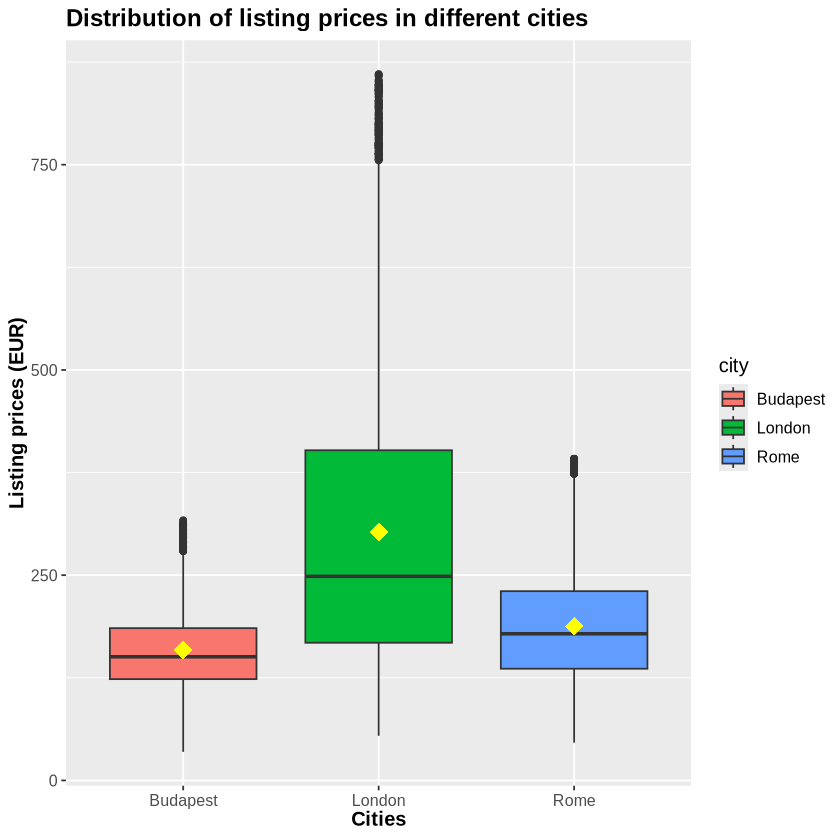

In [17]:
#To see the distribution of listing prices in different cities
city_listing_plot <-
    tidy_data %>%
    ggplot() +
    geom_boxplot(aes(x=city,y=realSum,fill=city))+
    ggtitle("Distribution of listing prices in different cities")+
    xlab("Cities")+
    ylab("Listing prices (EUR)")+
    stat_summary(aes(x=city, y=realSum),
        fun = mean, geom = "point", colour = "yellow", 
        shape = 18, size = 5
    ) +
    theme(
        text = element_text(size = 12),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )
city_listing_plot

The box plot above that shows the distribution of listing prices across Budapest, London and Rome, it helps with the question as it allows one to see how the listing prices varies between cities. 

Starting with Budapest, it has the smallest variability in its distribution as well as the lowest median and mean. London, has the largest variability in its distribution and higher median and mean. Lastly, Rome has a variability in its distribution of listing prices thats relatively larger than Budapest as well a larger median and mean than Budapest but lower than London.

Budapest and Rome shares a relatively similar distribution, median and mean of listing prices to one another, but London's wider distribution and higher median and mean may affect the goodness of fit of the model.

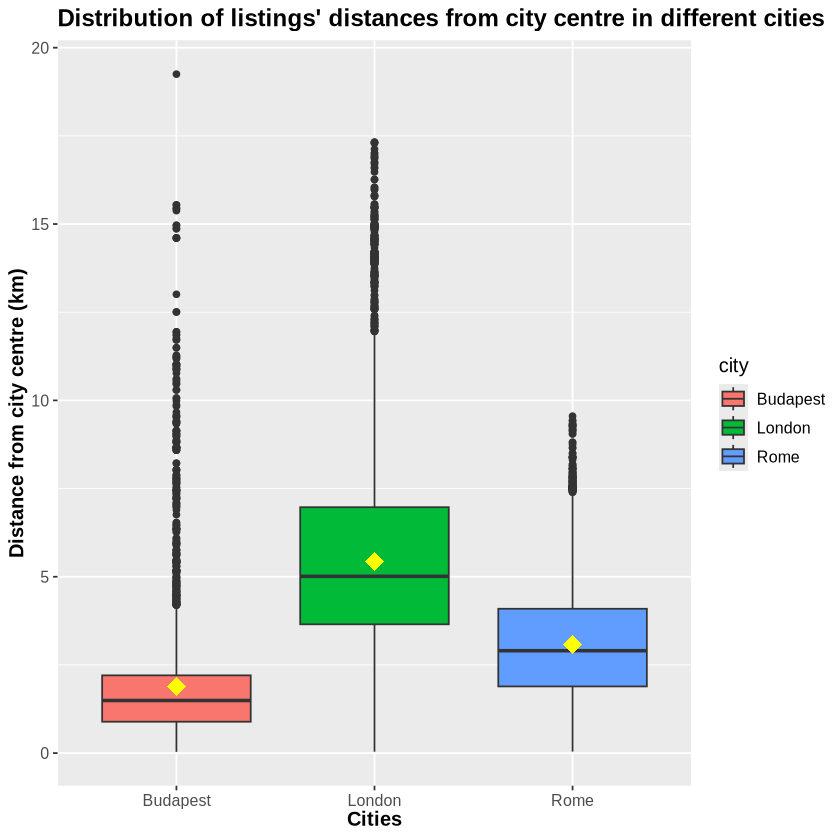

In [18]:
#To see the distribution of listing prices in different cities
city_listing_plot <-
    tidy_data %>%
    ggplot() +
    geom_boxplot(aes(x=city,y=dist,fill=city))+
    ggtitle("Distribution of listings' distances from city centre in different cities")+
    xlab("Cities")+
    ylab("Distance from city centre (km)")+
    stat_summary(aes(x=city, y=dist),
        fun = mean, geom = "point", colour = "yellow", 
        shape = 18, size = 5
    ) +
    theme(
        text = element_text(size = 12),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )
city_listing_plot

The box plot above that shows the distribution of listing prices across Budapest, London and Rome, it helps with the question as it allows one to see the distrubtion listings' distances from the city centers between cities. 

Starting with Budapest, it has the smallest variability in its distribution, median and mean among all the cities, but it has outliers that are distanced far from the maximum value of the boxplot. London has the largest variability in its distribution, edian and mean among all cities, it also has outliers that are distanced far from the maximum value of the boxplot but not as far as Budapest. Lastly, Rome's varaibility in its distribution, median and mean between the other cities. It has outliers that are relatively closer to the maximum value of the boxplot compare to the other cities.

This boxplot highlights how far the outliers of listings being from the city centre compare to the distrubtion's mean raises the concern if they will affect the goodness of fit of the model.

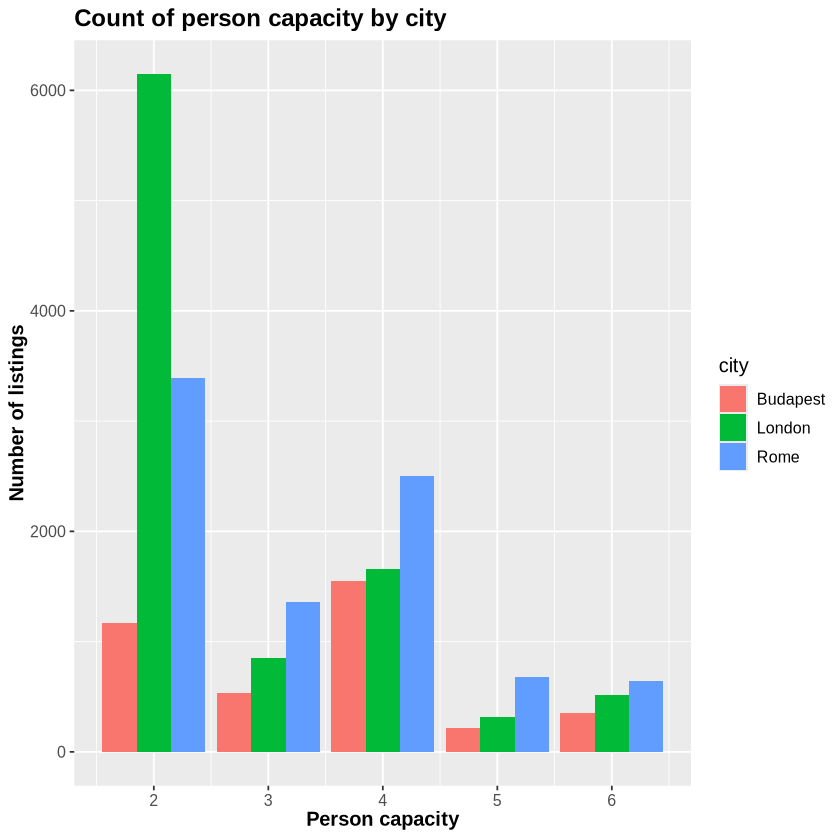

In [22]:
#To see the distribution of listing prices in different cities
city_listing_plot <-
  tidy_data %>%
  ggplot(aes(x = person_capacity, fill = city)) +
  geom_bar(position = "dodge") +
  ggtitle("Count of person capacity by city") +
  xlab("Person capacity") +
  ylab("Number of listings") +
  theme(
    text = element_text(size = 12),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

city_listing_plot

The bar plot above shows the count of different person capacity from Budapest, London and Rome, it helps with the question as it shows how many listings of different person capacities are from each city.

Starting from Budapest, it has the most listings with room capacity of 4 among its other room capacities. London has the most listings with room capacity of 2, with the other room capacity having far less in listings compared to it. Rome also has the most listings with room capacity of 2 among its other room capacities. Regardless of which city, the room capacity of 5 and 6 has the least amount of listings among all room capacities.

## Methods and plans

To answer the question, I believe the best method to approach it would be the Multi-Linear Regression (MLR) model. This is because the MLR model would allow me to observe and predict the change in the price of the listings with every unit increase in distance from city centre or between different room capacities in each city. Two assumptions that will be made for this model is that the change in the price of the listings with the change of room capacities is the same across all cities, and the other assumption is that the change in price of listings with every kilometer increase of distance from the city centre is different between cities. There are limitations of this method, such that if the response and inputs aren't linearly related, it may lead to a model with poor fit. It also assumes that the variation of residuals are homoschedastic, it will affect the standard error of our estimators and invalidate our confidence intervals and p-values if they are heterschedastic. 